# Online Payment Fraud Detection

### 1.Problem Statement

The dataset choosen for this project is to predict fraudulent online transactions with the help of machine learning models.
The dataset is taken from the Kaggle Website.

### 2.Aim Objective

Find the best machine learning algorithm to help them detect fraudulent transactions on their network.
This project will benefit bank identify the best algorithm for the job, identify the best metrics to keep in mind and to also identify further steps they would need to take based on the model selection.

### 3.Import package 

In [1]:
#import libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None) 

# visualize your data
import matplotlib.pyplot as plt
import seaborn as sns


###  4.Read dataset
Read dataset using read_csv function from pandas

In [2]:
dt=pd.read_csv(r'C:\\Users\\Priyanka Sawant\\Documents\\Project\\Cap_1\\PS_20174392719_1491204439457_log.csv')
dt.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


### 5.Understand and Prepare the Data

In [3]:
#make a copy of dataset
data=pd.DataFrame.copy(dt)
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


#### Data Cleaning 

In [4]:
#rename the variable name
data.rename(columns={'nameOrig':'sender','oldbalanceOrg':'sender_OldBal','newbalanceOrig':'sender_NewBal',
                         'nameDest':'recipient','oldbalanceDest':'recipient_OldBal','newbalanceDest':'recipient_NewBal'}, 
                          inplace =True)
data.head()


,step,type,amount,sender,sender_OldBal,sender_NewBal,recipient,recipient_OldBal,recipient_NewBal,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [5]:
data.columns

Index(['step', 'type', 'amount', 'sender', 'sender_OldBal', 'sender_NewBal',
       'recipient', 'recipient_OldBal', 'recipient_NewBal', 'isFraud'],
      dtype='object')

#### Data Types and Dimensions

In [6]:
# check the data types for variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   step              1048575 non-null  int64  
 1   type              1048575 non-null  object 
 2   amount            1048575 non-null  float64
 3   sender            1048575 non-null  object 
 4   sender_OldBal     1048575 non-null  float64
 5   sender_NewBal     1048575 non-null  float64
 6   recipient         1048575 non-null  object 
 7   recipient_OldBal  1048575 non-null  float64
 8   recipient_NewBal  1048575 non-null  float64
 9   isFraud           1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


We observe the above output provides us details about the DataFrame's structure, including the number of rows and columns, the column names and data types, and the amount of memory used by the DataFrame.

In [7]:
#Get the shape
data.shape

(1048575, 10)

We see the dataframe has 10 columns and 1048575 observations

#### Statistical Summary

In [8]:
# data frame with numerical features
data.describe()

,step,amount,sender_OldBal,sender_NewBal,recipient_OldBal,recipient_NewBal,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


The above output illustrates the summary statistics of all the numeric variables like the mean, median(50%), minimum, and maximum values, along with the standard deviation.We can also identify whether our data consits outliers through count variable.

In [9]:
data.dtypes

step                  int64
type                 object
amount              float64
sender               object
sender_OldBal       float64
sender_NewBal       float64
recipient            object
recipient_OldBal    float64
recipient_NewBal    float64
isFraud               int64
dtype: object

We see that dataframe also contain categorical & numerical values.

####  Missing Data 

In [10]:
data.isnull().sum()

step                0
type                0
amount              0
sender              0
sender_OldBal       0
sender_NewBal       0
recipient           0
recipient_OldBal    0
recipient_NewBal    0
isFraud             0
dtype: int64

There is no missing values

#### Check Unique Values

In [11]:
#unique values 
for i in data.columns:
    print({i:data[i].unique()})

{'step': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95], dtype=int64)}
{'type': array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)}
{'amount': array([ 9839.64,  1864.28,   181.  , ...,  9917.36, 14140.05, 11450.03])}
{'sender': array(['C1231006815', 'C1666544295', 'C1305486145', ..., 'C2037964975',
       'C1633237354', 'C1264356443'], dtype=object)}
{'sender_OldBal': array([1.701360e+05, 2.124900e+04, 1.810000e+02, ..., 4.798030e+05,
       9.054500e+04, 8.058495e+04])}
{'sender_NewBal': array([160296.36,  19384.72,      0.  , ...,   6404.95,  80584.95,
        69134.92])}
{'recipient'

There is no unique values in dataset.

#### Visualization

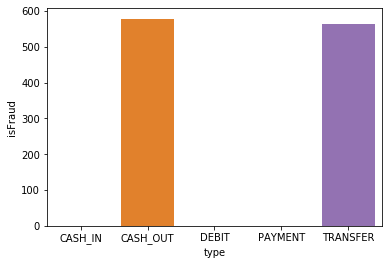

In [12]:
#What is the most type of transaction caused fraud?


t=pd.DataFrame(data.groupby(by=data['type'])['isFraud'].sum())
sns.barplot(data=t,x=t.index, y='isFraud')


From above output we can notice that most of the frauds happened is through Cash_out & Transfer transaction.

 Number of Fraud Cases: 1142
 Number of No Fraud Cases: 1047433


Text(0, 0.5, 'Count')

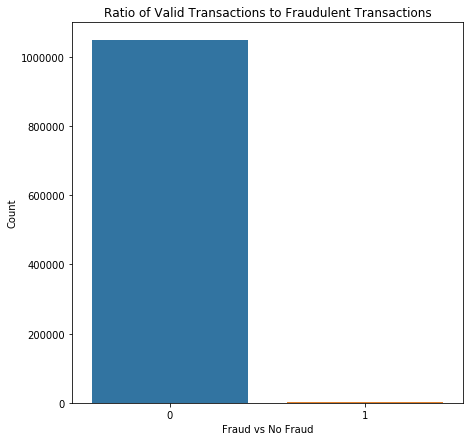

In [13]:
## number of fraud cases & not fraud cases
fraud_cases=len(data[data['isFraud']==1])
no_fraud_cases=len(data[data['isFraud']==0])


print(' Number of Fraud Cases:',fraud_cases)
print(' Number of No Fraud Cases:',no_fraud_cases)

plt.figure(figsize=(7,7))
plt.title('Ratio of Valid Transactions to Fraudulent Transactions')
sns.countplot(x='isFraud', data=data)
plt.xlabel('Fraud vs No Fraud')
plt.ylabel('Count')

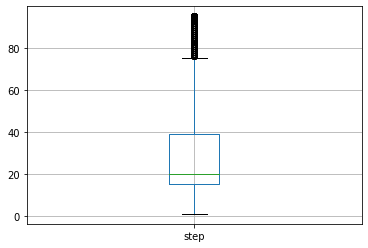

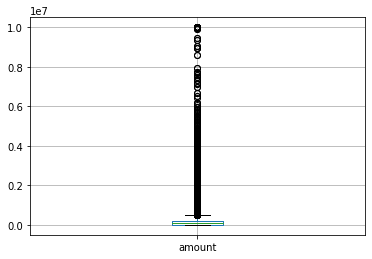

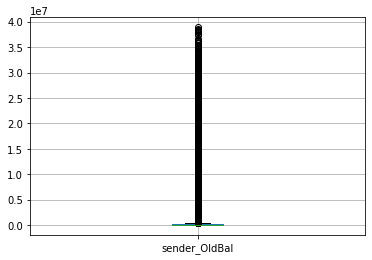

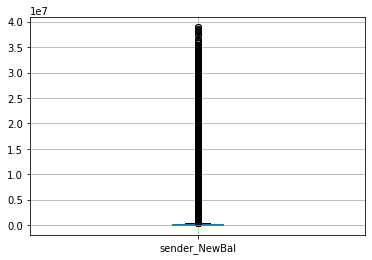

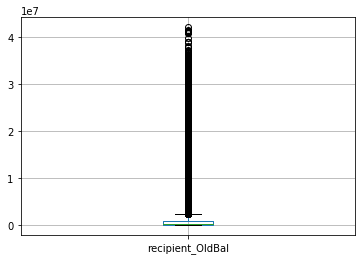

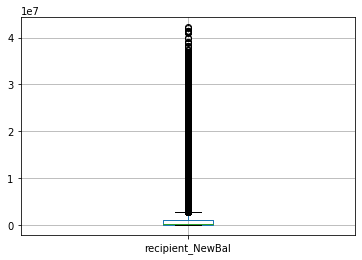

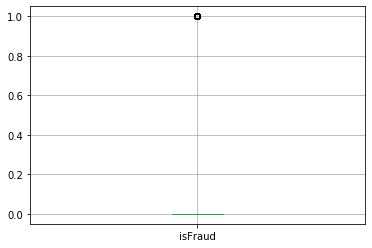

In [14]:
#make a copy of dataframe which includes only numerical variables.
Data_column=data[['step',  'amount', 'sender_OldBal', 'sender_NewBal',
        'recipient_OldBal', 'recipient_NewBal', 'isFraud']].copy()

#Checking outliers using boxplot
for i in Data_column.columns:   
    data.boxplot(column=i)   
    plt.show()   

Text(0, 0.5, 'amount')

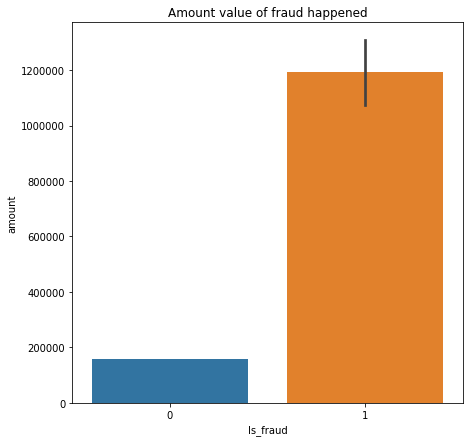

In [15]:
# Plot of amount transactions through bar plot
plt.figure(figsize=(7,7))
plt.title('Amount value of fraud happened')
sns.barplot(y='amount',x='isFraud', data=data)

plt.xlabel('Is_fraud')
plt.ylabel('amount')

The values are greater than 10,000. But it's important to note that the no-fraud values is greater than 10,00,000 also.

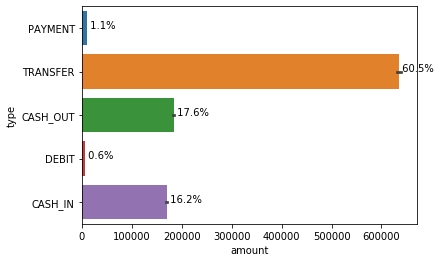

In [16]:
#plot bar chart to detect how much amount for particular type of transaction.
ax = sns.barplot(y='type', x='amount', data=data);

total = data['type'].size
for p in ax.patches:
        percentage = ' {:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

The majority transactions occours in trasnfer-type, however transactions greater than 10 Lakhs occour in cash-out and cash-in too.

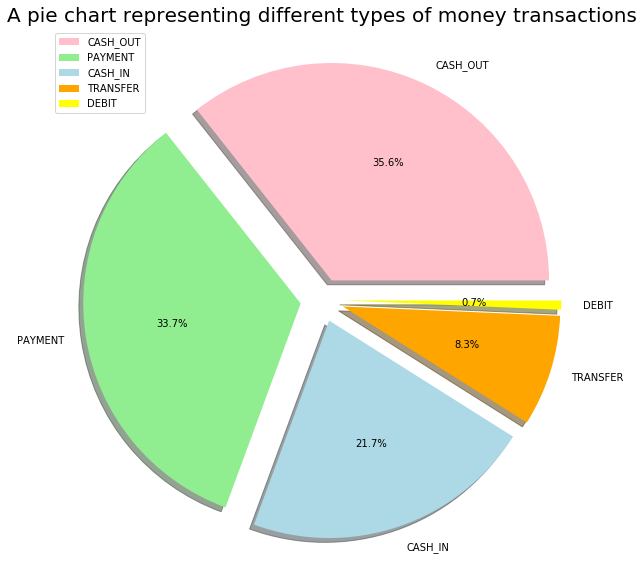

In [17]:
#pie chart for different type of money transaction.

labels = ['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT']
size = [373641, 353873, 227130, 86753, 7178]
colors = ['pink', 'lightgreen', 'lightblue', 'orange', 'yellow']
explode = [0.1, 0.1, 0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True,autopct='%1.1f%%')
plt.title('A pie chart representing different types of money transactions', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

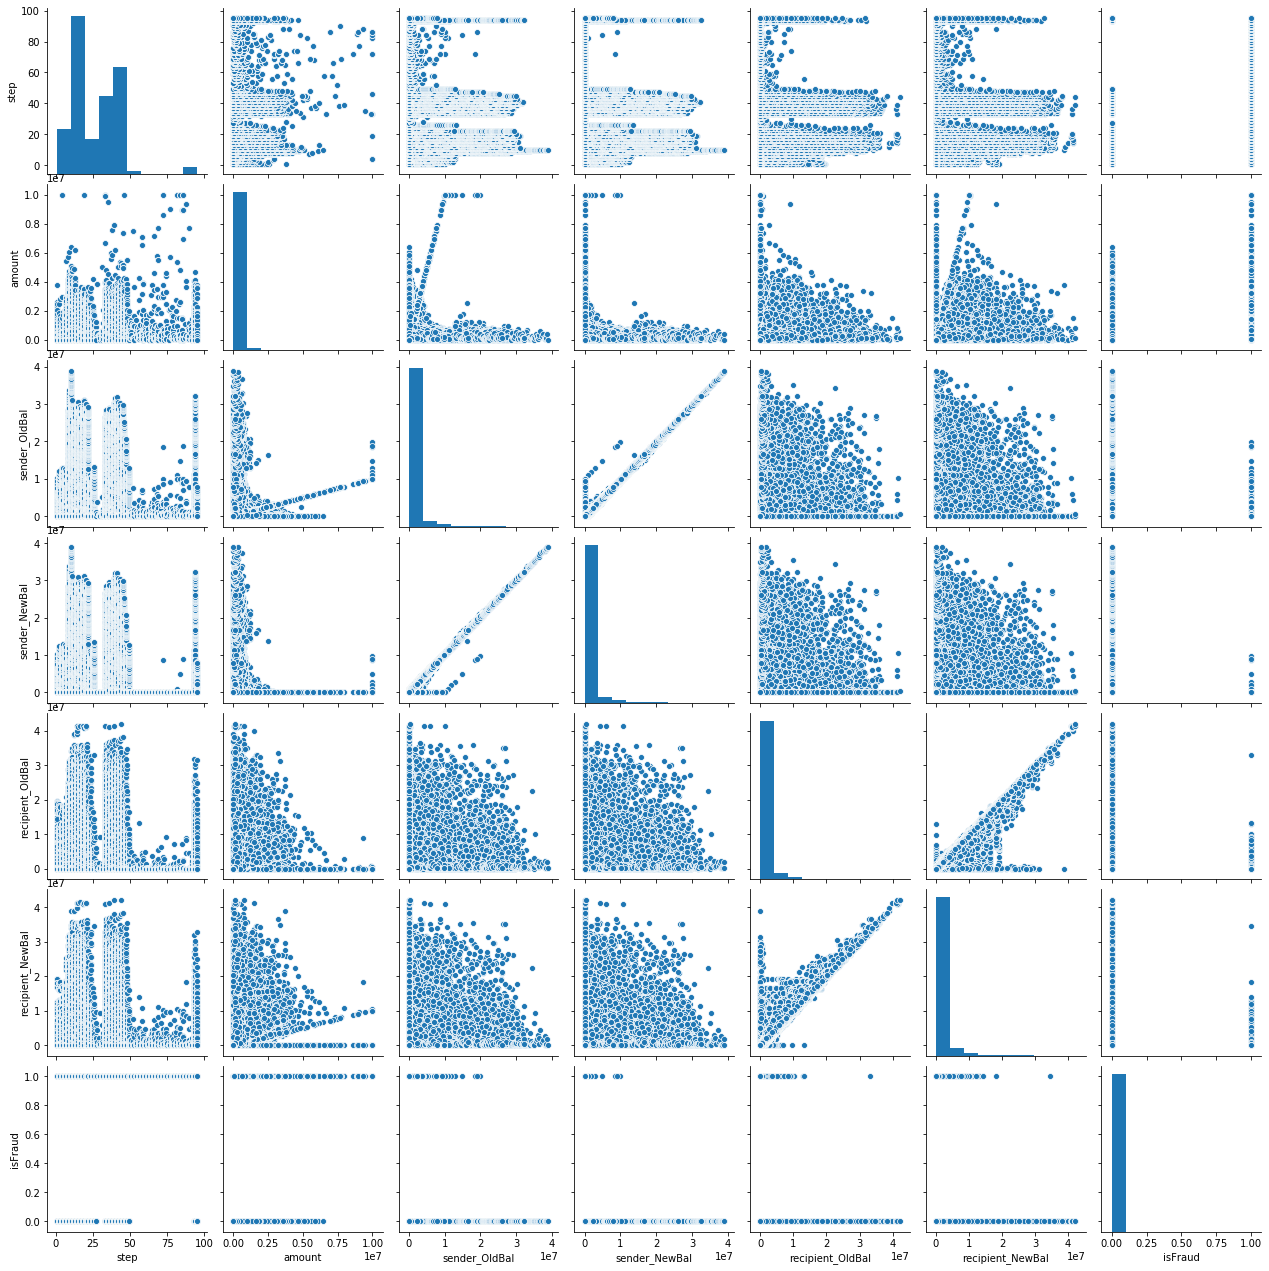

In [18]:
#.Pair plot graph  

# x_vars=['step', 'type', 'amount','sender_OldBal', 'sender_NewBal','recipient_OldBal', 'recipient_NewBal']
# y_vars="isFraud",kind='reg')

sns.pairplot(data)

From above we can see that 'amount','sender_OldBal', 'sender_NewBal','recipient_OldBal', 'recipient_NewBal' variables are highly affecting the target variable.

#### Correlation

Call the corr() function which will return the correlation matrix of numeric variables

In [19]:
# Chcek whether there is relation or not
corr_df=data.corr(method="pearson")
print(corr_df)


                      step    amount  sender_OldBal  sender_NewBal  \
step              1.000000 -0.025996      -0.006780      -0.007180   
amount           -0.025996  1.000000       0.004864      -0.001133   
sender_OldBal    -0.006780  0.004864       1.000000       0.999047   
sender_NewBal    -0.007180 -0.001133       0.999047       1.000000   
recipient_OldBal -0.002251  0.215558       0.093305       0.095182   
recipient_NewBal -0.019503  0.311936       0.064049       0.063725   
isFraud           0.045030  0.128862       0.003829      -0.009438   

                  recipient_OldBal  recipient_NewBal   isFraud  
step                     -0.002251         -0.019503  0.045030  
amount                    0.215558          0.311936  0.128862  
sender_OldBal             0.093305          0.064049  0.003829  
sender_NewBal             0.095182          0.063725 -0.009438  
recipient_OldBal          1.000000          0.978403 -0.007552  
recipient_NewBal          0.978403          1.000

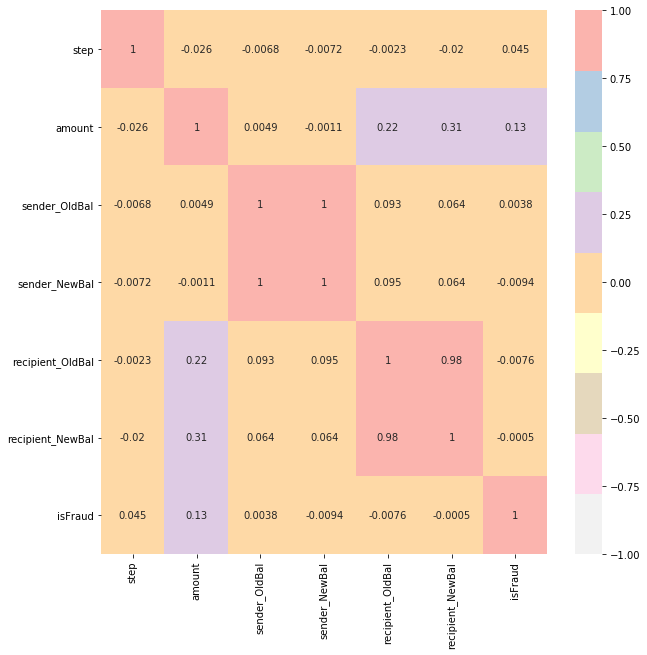

In [20]:
#correlation heatmap map
sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True,cmap ="Pastel1_r" )


Looking at both heatmap charts, we can see that there's a lack of correlation between the columns in this data. However, there is some correlation between amount. This correlation however is not very strong.

#### Feature Selection

As the sender and recipient ID are not important, we drop them from the data:

In [21]:
data.head()

,step,type,amount,sender,sender_OldBal,sender_NewBal,recipient,recipient_OldBal,recipient_NewBal,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [22]:
#drop sender variable
data = data.drop("sender", axis=1)

In [23]:
#drop recipient variable
data = data.drop("recipient", axis=1)

In [24]:
data.head()

,step,type,amount,sender_OldBal,sender_NewBal,recipient_OldBal,recipient_NewBal,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


After dropping the 'sender' and 'recipient' column, the only column with an object left is the 'type' column:

In [25]:
data.shape

(1048575, 8)

#### Label Encoding

In [26]:
#Convert records Categorical values to numerical values

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for x in data.columns:
    data[x]=le.fit_transform(data[x])


In [27]:
data.head()

,step,type,amount,sender_OldBal,sender_NewBal,recipient_OldBal,recipient_NewBal,isFraud
0,0,3,199846,177408,196785,0,0,0
1,0,3,41106,40939,58600,0,0,0
2,0,4,3977,437,0,0,0,1
3,0,1,3977,437,0,18649,0,1
4,0,3,228189,71310,78965,0,0,0


#### Create X & Y

In [28]:
#Create x & y 
X=data.values[:,:-1]
Y=data.values[:,-1]

print(X.shape)
print(Y.shape)

(1048575, 7)
(1048575,)


#### Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [30]:
from sklearn.model_selection import train_test_split

#split the data into test and train
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)  

In [31]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(734002, 7)
(734002,)
(314573, 7)
(314573,)


#### Create Fucntion

In [32]:
#create confusion matrics,Accurcay score & result tabulation Function below.

In [33]:

def cfm_plot(Y_test,Y_pred):
        from sklearn.metrics import confusion_matrix
        # compute the confusion matrix
        cm = confusion_matrix(Y_test, Y_pred)

        # label the confusion matrix  
        conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

        # set sizeof the plot
        plt.figure(figsize = (8,5))

        # plot a heatmap
        # cmap: colour code used for plotting
        # annot: prints the correlation values in the chart
        # cbar=False: Whether to draw a colorbar
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Pastel1_r", cbar=True)
        plt.show()

In [34]:
#Create function for Evalution Reports:

def Final_Report(Y_test,Y_pred):
    from sklearn.metrics import classification_report,accuracy_score

    # accuracy measures by classification_report()
    result = classification_report(Y_test,Y_pred)

    # print the result
    print(result)

    acc=accuracy_score(Y_test, Y_pred)
    print("Accuracy of the model: ",acc)

In [35]:
#Create a Function to print result in tabular format

def create_result_tabulation(Model,Y_test, Y_pred):

    from sklearn import metrics
    # create the result table for all accuracy scores
    # Accuracy measures considered for model comparision are 'Model',  'Precision Score', 'Recall Score','Accuracy Score', 'f1 - score'

    # create a list of column names
    cols = ['Model', 'Precision Score', 'Recall Score','Accuracy Score','f1-score']

    # creating an empty dataframe of the colums
    result_tabulation = pd.DataFrame(columns = cols)

    # compiling the required information
    Bagging_Meta_estimator = pd.Series({'Model': Model,
                     
                 'Precision Score': metrics.precision_score(Y_test, Y_pred),
                 'Recall Score': metrics.recall_score(Y_test, Y_pred),
                 'Accuracy Score': metrics.accuracy_score(Y_test, Y_pred),
                  'f1-score':metrics.f1_score(Y_test, Y_pred)})



    # appending our result table
    result_tabulation = result_tabulation.append(Bagging_Meta_estimator , ignore_index = True)
    return result_tabulation


### 6.Supervised Learning

#### 6.1. Logistics Regression

In [36]:
#1. Build the model
from sklearn.linear_model import LogisticRegression

#create a LogisticRegression
classifier=LogisticRegression()

#fiiting training data on the model
classifier.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
#2. Predict the values
from sklearn.metrics import accuracy_score
Y_pred_LogReg=classifier.predict(X_test)

LogReg_old_training = accuracy_score(Y_train, classifier.predict(X_train))
LogReg_old_test = accuracy_score(Y_test, Y_pred_LogReg)
print(f'Training Accuracy: {LogReg_old_training}')
print(f'Testing Accuracy: {LogReg_old_test}')
# print(Y_pred_LogReg)

Training Accuracy: 0.9993569499810627
Testing Accuracy: 0.9993133549287447


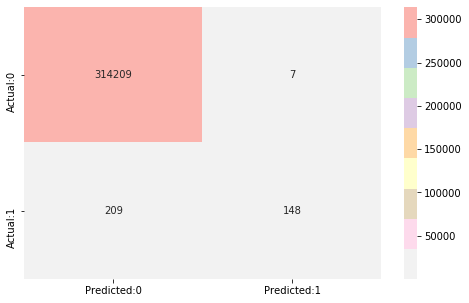

In [38]:
#3. Compute accuracy measures
cfm_plot(Y_test,Y_pred_LogReg)

In [39]:
Final_Report(Y_test,Y_pred_LogReg)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314216
           1       0.95      0.41      0.58       357

    accuracy                           1.00    314573
   macro avg       0.98      0.71      0.79    314573
weighted avg       1.00      1.00      1.00    314573

Accuracy of the model:  0.9993133549287447


In [40]:
#4. Tabulate the results

Logistic_Regression=create_result_tabulation("Logistic Regression",Y_test, Y_pred_LogReg)

#### 6.2. AdaBoost

In [41]:
# 1.Build Model

from sklearn.ensemble import AdaBoostClassifier

# build the model
adaboost = AdaBoostClassifier(random_state=10)
# fit the model
adaboost.fit(X_train, Y_train)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=10)

In [42]:
# 2.predict the values
Y_pred_adaboost  = adaboost.predict(X_test)

Adaboost_old_training = accuracy_score(Y_train, classifier.predict(X_train))
Adaboost_old_test = accuracy_score(Y_test, Y_pred_adaboost)
print(f'Training Accuracy: {Adaboost_old_training}')
print(f'Testing Accuracy: {Adaboost_old_test}')

Training Accuracy: 0.9993569499810627
Testing Accuracy: 0.9993260705782123


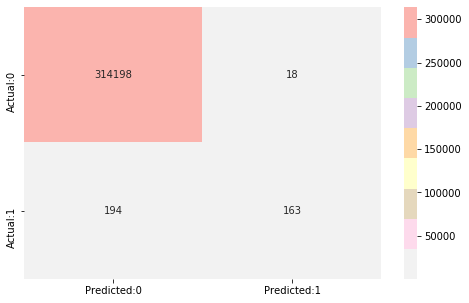

In [43]:
#3. Compute accuracy measures
cfm_plot(Y_test,Y_pred_adaboost)

In [44]:
Final_Report(Y_test,Y_pred_adaboost)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314216
           1       0.90      0.46      0.61       357

    accuracy                           1.00    314573
   macro avg       0.95      0.73      0.80    314573
weighted avg       1.00      1.00      1.00    314573

Accuracy of the model:  0.9993260705782123


In [45]:
#4. Tabulate the results

Ada_Boost=create_result_tabulation("Ada Boost",Y_test, Y_pred_adaboost)


#### 6.3. Decision Tree

In [46]:
#1.Build The model

from sklearn.tree import DecisionTreeClassifier


model_DecisionTree=DecisionTreeClassifier(criterion='gini',
                                         random_state=10)  
#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [47]:
#2. Predict the values for the test set

Y_pred_DT=model_DecisionTree.predict(X_test)

DT_old_training = accuracy_score(Y_train, model_DecisionTree.predict(X_train))
DT_old_test = accuracy_score(Y_test, Y_pred_DT)
print(f'Training Accuracy: {DT_old_training}')
print(f'Testing Accuracy: {DT_old_test}')


Training Accuracy: 1.0
Testing Accuracy: 0.9995803835675662


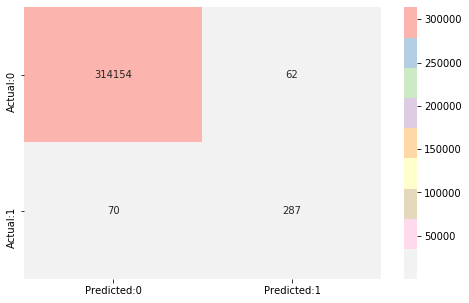

In [48]:
#3. Compute accuracy measures
cfm_plot(Y_test,Y_pred_DT)

In [49]:
#Print Classification Report
Final_Report(Y_test, Y_pred_DT)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314216
           1       0.82      0.80      0.81       357

    accuracy                           1.00    314573
   macro avg       0.91      0.90      0.91    314573
weighted avg       1.00      1.00      1.00    314573

Accuracy of the model:  0.9995803835675662


In [50]:
#4. Tabulate the results

Decision_Tree=create_result_tabulation("Decision Tree",Y_test, Y_pred_DT)


#### 6.4.RandomForest

In [51]:
#1.Build model
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(n_estimators=100,random_state=10,bootstrap=True,    
                                         max_features=0.6)    

#fit the model on the data and predict the values
model_RandomForest.fit(X_train,Y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=0.6,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [52]:
#2. Predict the values for the test set
Y_pred_RF=model_RandomForest.predict(X_test)

RF_old_training = accuracy_score(Y_train, model_RandomForest.predict(X_train))
RF_old_test = accuracy_score(Y_test, Y_pred_RF)
print(f'Training Accuracy: {RF_old_training}')
print(f'Testing Accuracy: {RF_old_test}')

Training Accuracy: 1.0
Testing Accuracy: 0.9997584026601138


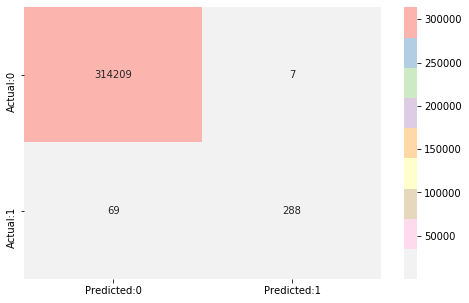

In [53]:
#3. Compute accuracy measures
cfm_plot(Y_test,Y_pred_RF)

In [54]:
Final_Report(Y_test, Y_pred_RF)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314216
           1       0.98      0.81      0.88       357

    accuracy                           1.00    314573
   macro avg       0.99      0.90      0.94    314573
weighted avg       1.00      1.00      1.00    314573

Accuracy of the model:  0.9997584026601138


In [55]:
#4. Tabulate the results

Random_Forest=create_result_tabulation("Random Forest",Y_test, Y_pred_RF)

### 7. Model Comparision

In [56]:
modeling_performance = pd.concat([Logistic_Regression,Ada_Boost,Decision_Tree,Random_Forest])
modeling_performance

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.954839,0.414566,0.999313,0.578125
0,Ada Boost,0.900552,0.456583,0.999326,0.605948
0,Decision Tree,0.822350,0.803922,0.999580,0.813031
0,Random Forest,0.976271,0.806723,0.999758,0.883436


#### Result Interpretation

### 8. Test Prediction

In [57]:
#Let's predict for these set of values

# Features = [step,type, amount, sender_oldbalanceOrg, sender_newbalanceOrig,recipient_OldBal,recipient_NewBal]
features = np.array([[0,4,9000.60, 9000.60,1967.85, 0.0,0.0]])
print(model_RandomForest.predict(features))

[1]


In [58]:
features1 = np.array([[0,4,9000.60, 9000.60,1967.85, 1956.0,0.0]])
print(model_RandomForest.predict(features1))


features2 = np.array([[1,1, 10000, 0, 100,0,0]])
print(model_RandomForest.predict(features2))

# """
# [1]=Fraud
# [0]=No fraud

# """

[1]
[0]


### 9. Conclusion